<center>
<h1> Cinematica Inversa para manipulaores</h1>
<font color="blue" size="4"><b>
Manipulador "RR" <br>
Fundamentos de Robótica <br>
</b></font></br>
<i>Alumno: José Carlos López Arriaga</i>
</center>



In [3]:
from sympy import*
from sympy.matrices import*
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
init_printing(use_latex = true)

### Funcion que realiza el metodo de Newton-Raphson

In [4]:
def NewtonRaphson(J, b, X0, vals, eps = 1e-5): # J = matriz jacobiabana, b = error, X0 = supocisio del valor, eps = toleracncia del error
    k = 1
    b = b.subs(vals).evalf()
    while true:
        x = ((J.subs(X0).subs(vals)).inv()*b.subs(X0)).evalf()
        if x.norm() < eps: break
        for jj, ky in enumerate(X0):
                X0[ky] += (x[jj]).evalf()
        k += 1
    return X0, x, k

### Manipulador RR
$P_x$ = La posicion en x del extremo del manipulador a la que se desea llegar

$P_y$ = la Posicione n y del extremo del manipulador a la que se desea llegar

$L_1$ y $L_2$ son las dimensiones conocidas de los eslabones del manipulador

$\theta_1$ y $\theta_2$ son los valores que necesitamos conocer para que el manipulador quede en las coordenadas $P_x$, $P_y$

In [5]:
theta1, theta2 = symbols("\\theta_1, \\theta_2")
Px = 50
Py = 120
L1 = 100
L2 = 100

F1 = L1*cos(theta1) + L2*cos(theta1 + theta2) - Px
F2 = L1*sin(theta1) + L2*sin(theta1 + theta2) - Py

### Jacobiano de las ecuaciones resultantes y aplicacion de Newton-Raphson

In [6]:
F = Matrix([F1, F2])
J = F.jacobian([theta1, theta2]) #Para calcular el jacobiano de una matriz [incognitas]
X0 = {theta1:pi/6, theta2:pi/6}  #Variables que se desean conocer colocadas en un diccionario

Xs, X, K = NewtonRaphson(J, -F, X0, {})

### Valores obtenidos de $\theta_1$ y $\theta_2$

In [7]:
theta1R = (Xs[theta1]*180/pi).evalf(6)
theta2R = (Xs[theta2]*180/pi).evalf(6)

print(f"θ1 = {theta1R}°")
print(f"θ2 = {theta2R}°")

θ1 = 17.9217°
θ2 = 98.9168°


### Funciones para dibujar eslabones, matriz de Denavit-Hartenberg, dibujar sistemas de referencia

In [8]:
#Function para realizar el grafico de los eslabones
def plotlink(p0, u, *args, **kwargs):
    plt.plot([p0[0],p0[0]+u[0]], [p0[1],p0[1]+u[1]], *args, **kwargs)

#Funcion para la matriz de Denavit-Hartenberg
def MDH(ai, alphai, di, thetai):
    thetaic = thetai
    alphaic = alphai
    
    M = Matrix([
        [cos(thetaic), -sin(thetaic)*cos(alphaic),  sin(thetaic)*sin(alphaic), ai*cos(thetaic)],
        [sin(thetaic),  cos(thetaic)*cos(alphaic), -cos(thetaic)*sin(alphaic), ai*sin(thetaic)],
        [0,             sin(alphaic),               cos(alphaic),              di],
        [0,             0,                          0,                         1]
    ])
    
    return M
#Funcion para dibujar los sistemas de referencia
def draw_uv(T):
    O = T[:3, 3]
    U = T[:3, 0]
    V = T[:3, 1]
    plt.quiver(float(O[0]), float(O[1]), float(U[0]), float(U[1]), color = "r")
    plt.quiver(float(O[0]), float(O[1]), float(V[0]), float(V[1]), color = "g")

### Visualizacion del manipulador de modo grafico

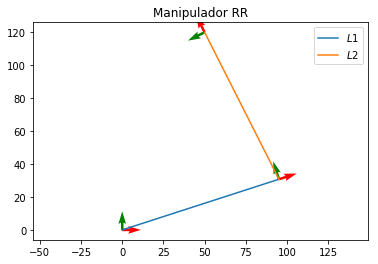

In [9]:
H01 = MDH(L1, 0, 0, Xs[theta1])
H12 = MDH(L2, 0, 0, Xs[theta2])
H02 = H01*H12

theta01 = Xs[theta1] + Xs[theta2] #Theta2 medida desde el sistema de referencia 1

Pr1 = np.array([H01[0,3], H01[1,3], 0])
Pr2 = np.array([L2*cos(theta01), L2*sin(theta01), 0])

plt.cla
plotlink([0,0], Pr1, label = "$L1$")
plotlink(Pr1, Pr2, label = "$L2$")

draw_uv(eye(4))
draw_uv(H01)
draw_uv(H02)

plt.axis("equal")
plt.legend()
plt.title("Manipulador RR")
plt.show()